In [36]:
import pandas as pd

df = pd.read_csv("A:/NTI/SentimentAnalysisProject/data/processed/talabat_cleaned_reviews.csv")
df.dropna(subset=['clean_text', 'sentiment'], inplace=True)
df = df[df['sentiment'].isin(['positive', 'negative'])]  # focus on these
df.sample(5)

,userName,content,score,at,sentiment,clean_text
9527,Infinix Not10,فد شي,5,2024-12-09 17:39:30,positive,فد شي
7035,مستخدم Google,رجعوا موقع العميل والمسافات,1,2025-02-24 20:29:18,negative,رجعوا موقع العميل والمسافات
1994,مستخدم Google,تجربه سيئه تم سحب مبلغ ٩٤٥ مني يوم ٢٥ وتأتي ات...,1,2025-06-12 21:00:46,negative,تجربه سيئه تم سحب مبلغ مني يوم وتاتي اتسحب مني...
1076,مستخدم Google,ممتاز,5,2025-06-30 16:42:25,positive,ممتاز
5821,مستخدم Google,ممتازززززة,5,2025-03-30 15:48:59,positive,ممتازززززه


In [37]:
from sklearn.model_selection import train_test_split

x = df['clean_text']
y = df['sentiment']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)


In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

    negative       0.87      0.78      0.82       412
    positive       0.94      0.97      0.95      1424

    accuracy                           0.93      1836
   macro avg       0.91      0.87      0.89      1836
weighted avg       0.92      0.93      0.92      1836



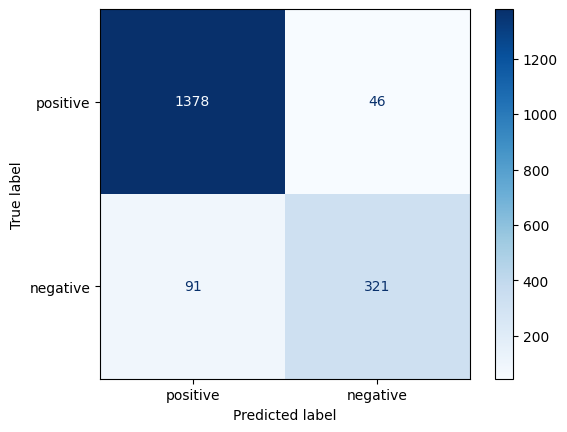

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["positive", "negative"])
disp.plot(cmap="Blues")


In [41]:
print("accuracy score: ", accuracy_score(y_test, y_pred))

accuracy score:  0.9253812636165577


In [42]:
import joblib

joblib.dump(model, "A:/NTI/SentimentAnalysisProject/models/sentiment_model.pkl")
joblib.dump(tfidf, "A:/NTI/SentimentAnalysisProject/models/TfidfVectorizer.pkl")


['A:/NTI/SentimentAnalysisProject/models/TfidfVectorizer.pkl']

In [43]:
sample = ["التطبيق ممتاز جدًا والخدمة رائعة"]

sample_tfidf = tfidf.transform(sample)
pred = model.predict(sample_tfidf)

print(f"sentence: {sample[0]}")
print(f"prediction: {pred[0]}")


sentence: التطبيق ممتاز جدًا والخدمة رائعة
prediction: positive


In [44]:
sample = ["الطلب ما وصل، وكل مرّة أطلب فيه تأخير"]

sample_tfidf = tfidf.transform(sample)
pred = model.predict(sample_tfidf)

print(f"sentence: {sample[0]}")
print(f"prediction: {pred[0]}")


sentence: الطلب ما وصل، وكل مرّة أطلب فيه تأخير
prediction: negative
